<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/from_Solution_Homework_to_Regression_withNOSCALER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! wget https://storage.googleapis.com/1sep/2008.csv

--2023-10-23 07:23:40--  https://storage.googleapis.com/1sep/2008.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 108.177.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [text/csv]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M  19.6MB/s    in 35s     

2023-10-23 07:24:16 (19.0 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [4]:
! wc -l 2008.csv

7009729 2008.csv


In [5]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [6]:
#raw_pd = pd.read_csv("2008.csv")

In [7]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1450.0,1435,1806.0,1745,WN,3244,...,7.0,8.0,0,NaN,0,0.0,0.0,6.0,0.0,15.0
1,2008,1,3,4,1230.0,1215,1331.0,1310,WN,2018,...,4.0,21.0,0,NaN,0,0.0,0.0,6.0,0.0,15.0
2,2008,1,3,4,639.0,640,859.0,925,WN,1769,...,5.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,611.0,615,819.0,835,WN,3147,...,3.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1125.0,1010,1224.0,1110,WN,1016,...,5.0,9.0,0,NaN,0,9.0,0.0,0.0,0.0,65.0


In [8]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68729 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68593 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69250 non-null  object 
 11  ActualElapsedTime  68565 non-null  float64
 12  CRSElapsedTime     70088 non-null  float64
 13  AirTime            68565 non-null  float64
 14  ArrDelay           68565 non-null  float64
 15  DepDelay           68729 non-null  float64
 16  Origin             700

In [9]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,70096.0,6.383717,3.410022,1.0,3.0,6.0,9.0,12.0
DayofMonth,70096.0,15.682065,8.802671,1.0,8.0,16.0,23.0,31.0
DayOfWeek,70096.0,3.916671,1.990219,1.0,2.0,4.0,6.0,7.0
DepTime,68729.0,1334.520814,477.025631,1.0,929.0,1326.0,1728.0,2400.0
CRSDepTime,70096.0,1326.388482,463.414194,1.0,926.0,1320.0,1715.0,2359.0
ArrTime,68593.0,1483.555202,503.353539,1.0,1109.0,1512.0,1909.0,2400.0
CRSArrTime,70096.0,1495.737646,481.010834,1.0,1116.0,1517.0,1907.0,2400.0
FlightNum,70096.0,2214.851475,1961.376096,1.0,617.0,1561.0,3499.0,7828.0
ActualElapsedTime,68565.0,127.375148,69.894642,15.0,77.0,109.0,157.0,697.0


In [10]:
## เตรียมข้อมูลสำหรับการวิเคราะห์หา C.V.

describe_pd = pd.DataFrame(raw_pd.describe().transpose())

describe_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Year to LateAircraftDelay
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   24 non-null     float64
 1   mean    24 non-null     float64
 2   std     24 non-null     float64
 3   min     24 non-null     float64
 4   25%     24 non-null     float64
 5   50%     24 non-null     float64
 6   75%     24 non-null     float64
 7   max     24 non-null     float64
dtypes: float64(8)
memory usage: 2.2+ KB


In [11]:
## ดู Dispersion จาก C.V.

#describe_pd['std'].apply(lambda x: x/100)
describe_pd.assign(cv=lambda x: ((100/x['mean'])*x['std']))[['mean','std','cv']]
#df.assign(Discount_Percent=lambda x: (100/x.Fee)*x.Discount)

,mean,std,cv
Year,2008.000000,0.000000,0.000000
Month,6.383717,3.410022,53.417502
DayofMonth,15.682065,8.802671,56.132093
DayOfWeek,3.916671,1.990219,50.814038
DepTime,1334.520814,477.025631,35.745087
CRSDepTime,1326.388482,463.414194,34.938044
ArrTime,1483.555202,503.353539,33.928872
CRSArrTime,1495.737646,481.010834,32.158770
FlightNum,2214.851475,1961.376096,88.555649
ActualElapsedTime,127.375148,69.894642,54.873061


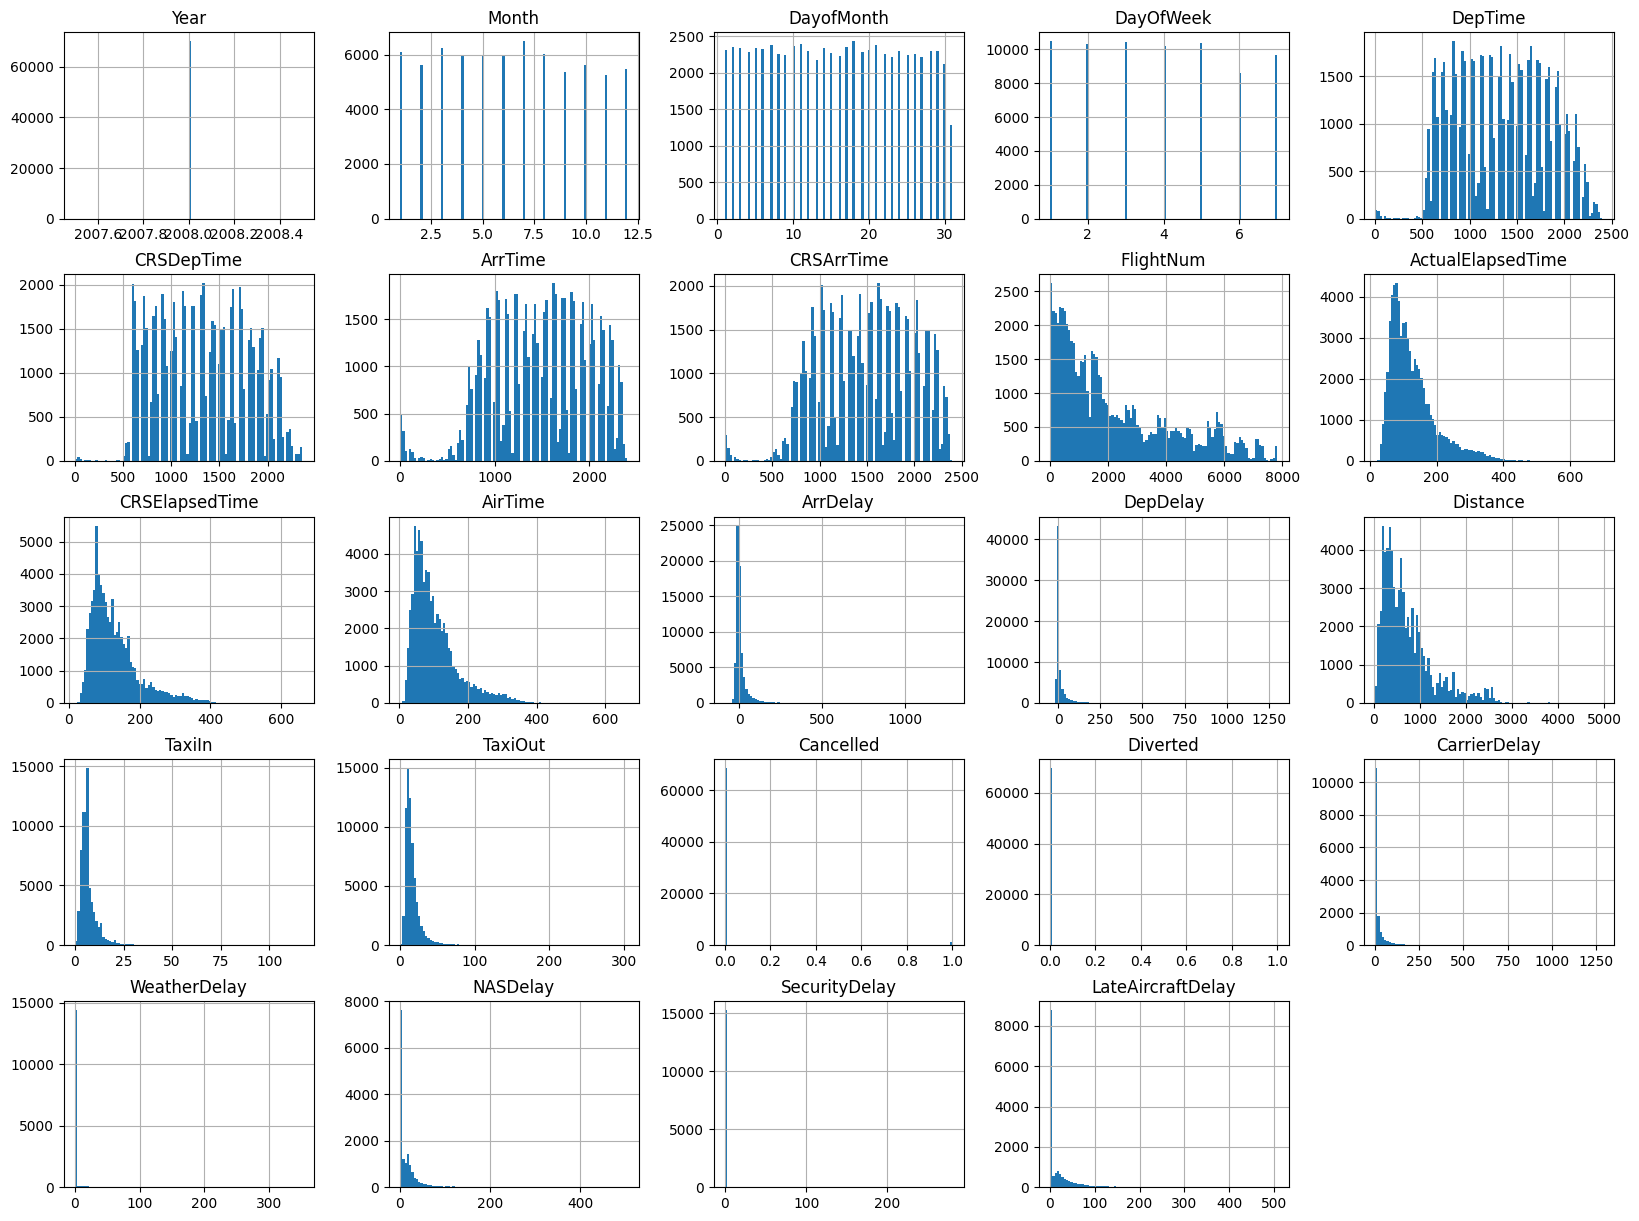

In [12]:
## ดู Distribution ของแต่ละ column

raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [13]:
categorical = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Numerical columns are: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


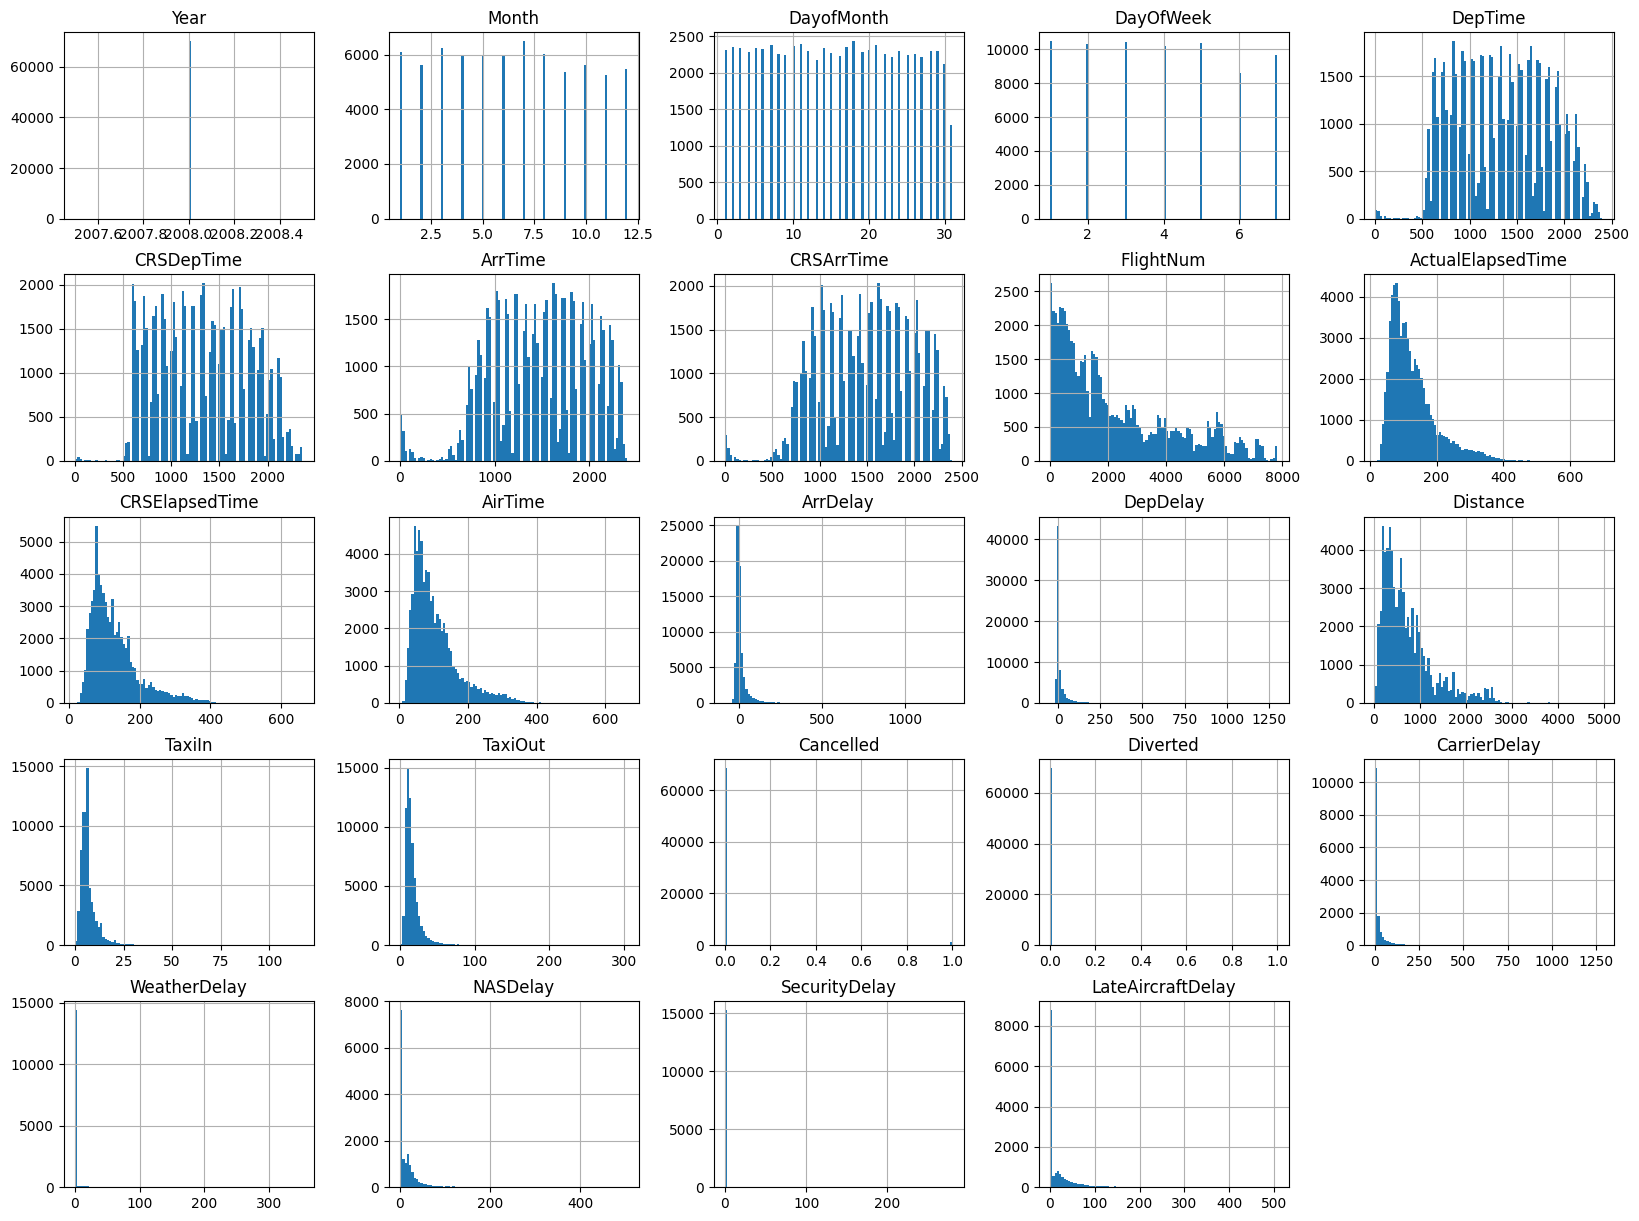

In [14]:
raw_pd[numerical].hist(bins=100, figsize=(20,15))
plt.show()

In [15]:
raw_pd['AirTime'].describe()

count    68565.000000
mean       104.052636
std         67.177394
min          2.000000
25%         56.000000
50%         86.000000
75%        132.000000
max        664.000000
Name: AirTime, dtype: float64

<Axes: xlabel='AirTime'>

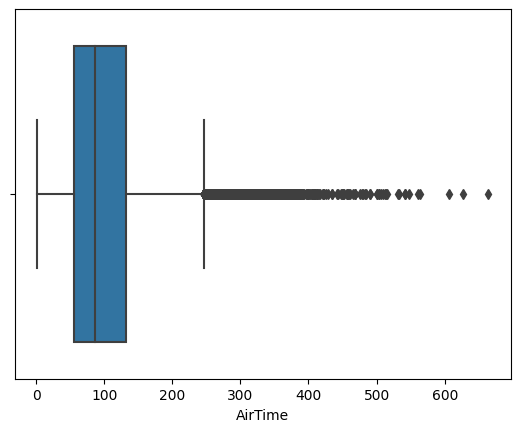

In [16]:
sns.boxplot(x=raw_pd['AirTime'])

In [17]:
raw_pd['ActualElapsedTime'].describe()

count    68565.000000
mean       127.375148
std         69.894642
min         15.000000
25%         77.000000
50%        109.000000
75%        157.000000
max        697.000000
Name: ActualElapsedTime, dtype: float64

<Axes: xlabel='ActualElapsedTime'>

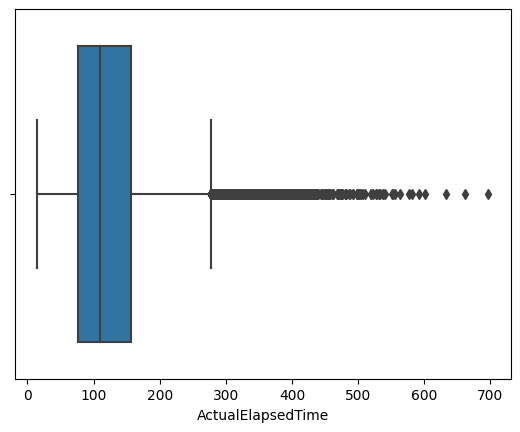

In [18]:
sns.boxplot(x=raw_pd['ActualElapsedTime'])

In [19]:
raw_pd['Cancelled'].describe()

count    70096.000000
mean         0.019616
std          0.138677
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Cancelled, dtype: float64

In [20]:
raw_pd.groupby(by='Cancelled')['Cancelled'].count()

Cancelled
0    68721
1     1375
Name: Cancelled, dtype: int64

In [21]:
raw_pd['Diverted'].describe()

## สังเกตค่า max, min แล้วคือ [0,1] ซึ่งเป็น Discrete ไม่ใช่ continuous
## จึงไม่เหมาะกับการวิเคราะห์ด้วย boxplot

count    70096.000000
mean         0.002226
std          0.047123
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Diverted, dtype: float64

In [22]:
## sns.boxplot(x=raw_pd['Diverted'])

In [23]:
raw_pd.groupby(by='Diverted')['Diverted'].count()

Diverted
0    69940
1      156
Name: Diverted, dtype: int64

In [24]:
analysisCol_list = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [25]:
raw_pd[analysisCol_list[0]].describe()

count    15353.000000
mean        15.835407
std         39.793739
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max       1286.000000
Name: CarrierDelay, dtype: float64

<Axes: xlabel='CarrierDelay'>

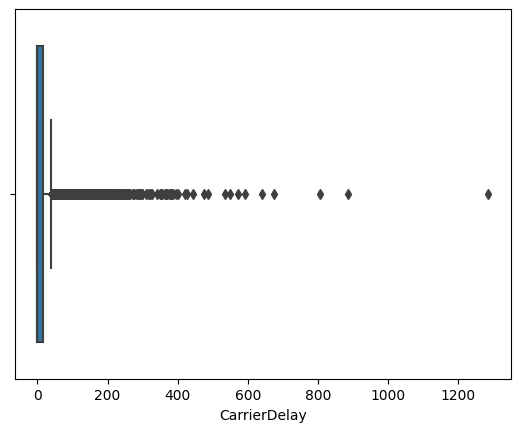

In [26]:
sns.boxplot(x=raw_pd[analysisCol_list[0]])

In [27]:
raw_pd[analysisCol_list[1]].describe()

count    15353.000000
mean         2.825572
std         16.921590
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        351.000000
Name: WeatherDelay, dtype: float64

<Axes: xlabel='WeatherDelay'>

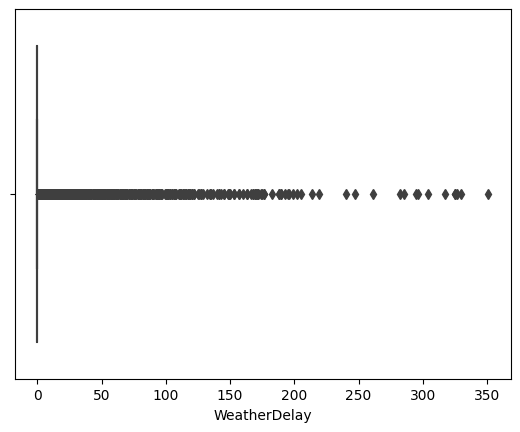

In [28]:
sns.boxplot(x=raw_pd[analysisCol_list[1]])

In [29]:
raw_pd[analysisCol_list[2]].describe()

count    15353.000000
mean        17.212206
std         32.083194
min          0.000000
25%          0.000000
50%          6.000000
75%         21.000000
max        504.000000
Name: NASDelay, dtype: float64

<Axes: xlabel='NASDelay'>

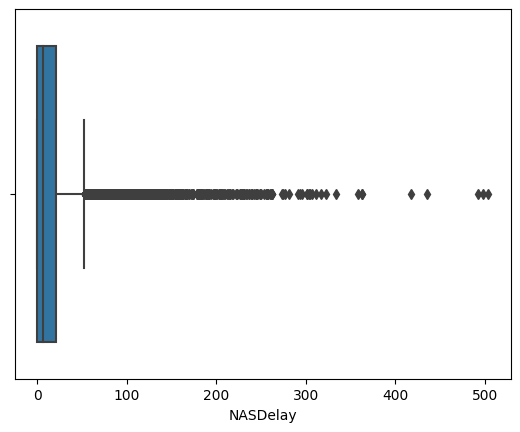

In [30]:
sns.boxplot(x=raw_pd[analysisCol_list[2]])

In [31]:
raw_pd[analysisCol_list[3]].describe()

count    15353.000000
mean         0.111965
std          3.254377
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        280.000000
Name: SecurityDelay, dtype: float64

<Axes: xlabel='SecurityDelay'>

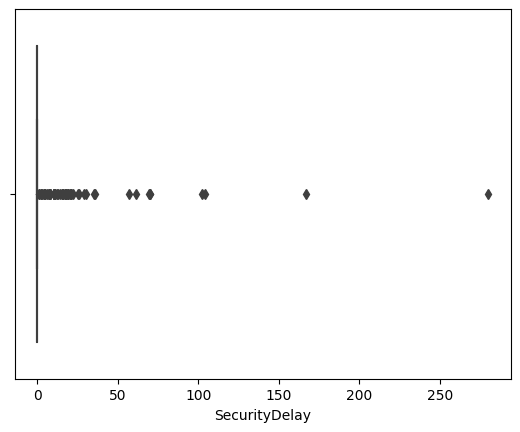

In [32]:
sns.boxplot(x=raw_pd[analysisCol_list[3]])

In [33]:
raw_pd[analysisCol_list[4]].describe()

count    15353.000000
mean        20.790204
std         39.320954
min          0.000000
25%          0.000000
50%          0.000000
75%         26.000000
max        507.000000
Name: LateAircraftDelay, dtype: float64

<Axes: xlabel='LateAircraftDelay'>

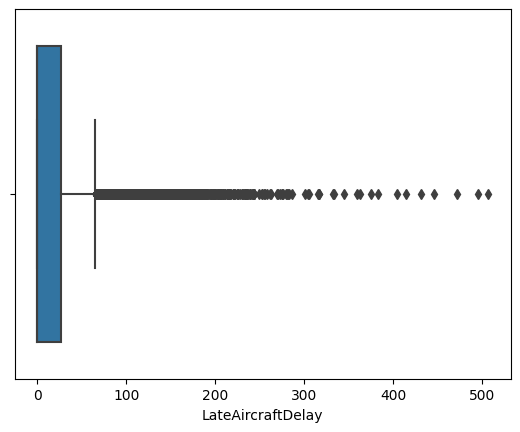

In [34]:
sns.boxplot(x=raw_pd[analysisCol_list[4]])

In [35]:
raw_pd['ArrDelay'].describe()

count    68565.000000
mean         8.243083
std         38.242276
min        -86.000000
25%        -10.000000
50%         -2.000000
75%         12.000000
max       1286.000000
Name: ArrDelay, dtype: float64

<Axes: xlabel='ArrDelay'>

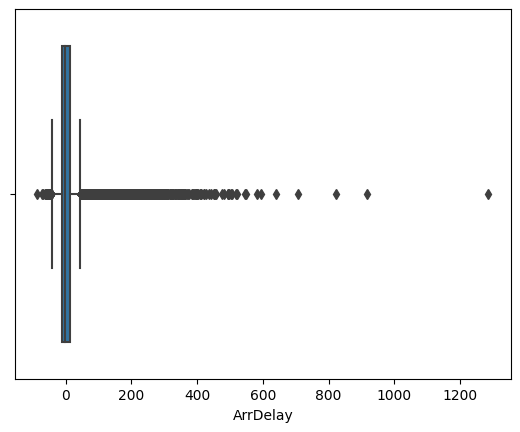

In [36]:
sns.boxplot(x=raw_pd['ArrDelay'])

In [37]:
raw_pd['DepDelay'].describe()

count    68729.000000
mean         9.999840
std         34.865786
min        -48.000000
25%         -4.000000
50%         -1.000000
75%          8.000000
max       1300.000000
Name: DepDelay, dtype: float64

<Axes: xlabel='DepDelay'>

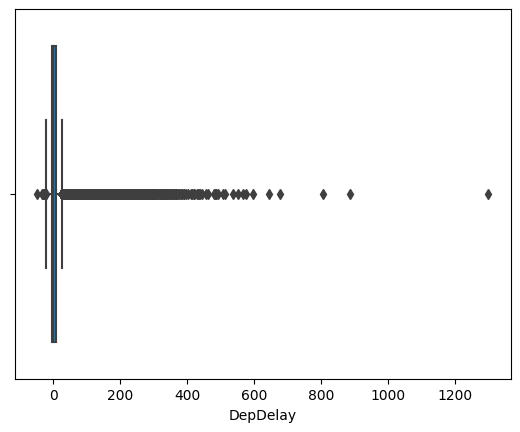

In [38]:
sns.boxplot(x=raw_pd['DepDelay'])

In [39]:
raw_pd['TaxiIn'].describe()

count    68593.000000
mean         6.839852
std          4.810725
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        117.000000
Name: TaxiIn, dtype: float64

<Axes: xlabel='TaxiIn'>

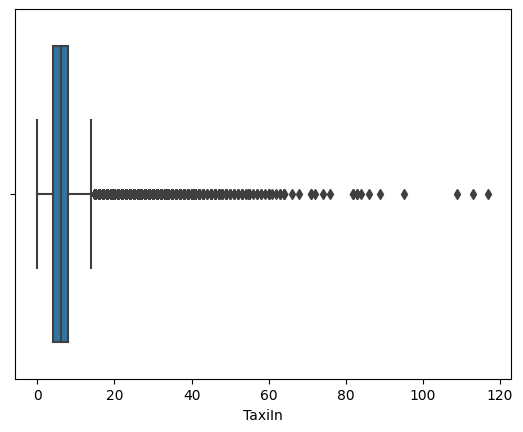

In [40]:
sns.boxplot(x=raw_pd['TaxiIn'])

In [41]:
raw_pd['TaxiOut'].describe()

count    68723.000000
mean        16.490811
std         11.355230
min          0.000000
25%         10.000000
50%         14.000000
75%         19.000000
max        304.000000
Name: TaxiOut, dtype: float64

<Axes: xlabel='TaxiOut'>

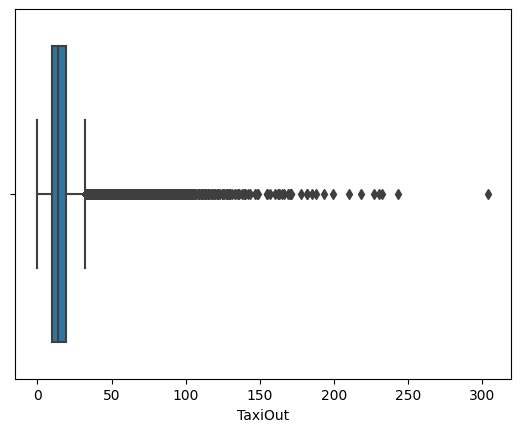

In [42]:
sns.boxplot(x=raw_pd['TaxiOut'])

In [43]:
raw_pd['Distance'].describe()

count    70096.000000
mean       726.463293
std        559.334872
min         31.000000
25%        326.000000
50%        581.000000
75%        951.000000
max       4962.000000
Name: Distance, dtype: float64

<Axes: xlabel='Distance'>

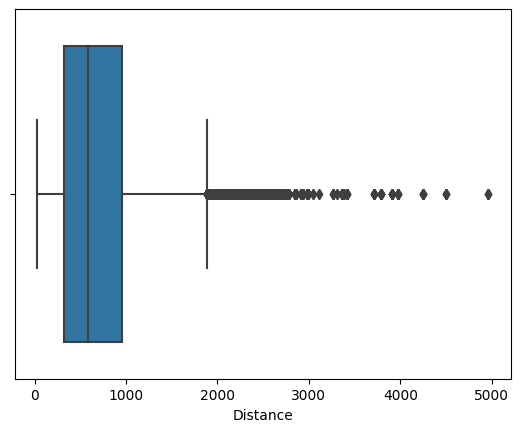

In [44]:
sns.boxplot(x=raw_pd['Distance'])

In [45]:
raw_pd['AirTime'].describe()

count    68565.000000
mean       104.052636
std         67.177394
min          2.000000
25%         56.000000
50%         86.000000
75%        132.000000
max        664.000000
Name: AirTime, dtype: float64

<Axes: xlabel='AirTime'>

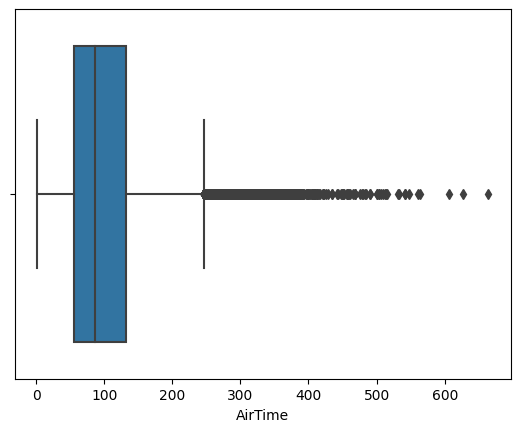

In [46]:
sns.boxplot(x=raw_pd['AirTime'])

In [47]:
## Multivariate Analysis - Correlation

<Axes: xlabel='ArrDelay', ylabel='LateAircraftDelay'>

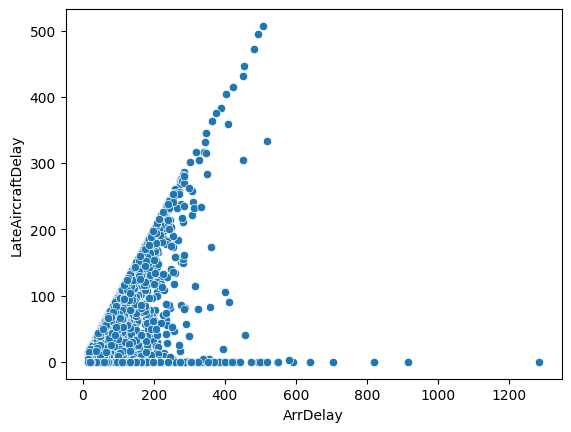

In [48]:
sns.scatterplot(data=raw_pd, x='ArrDelay',y='LateAircraftDelay')

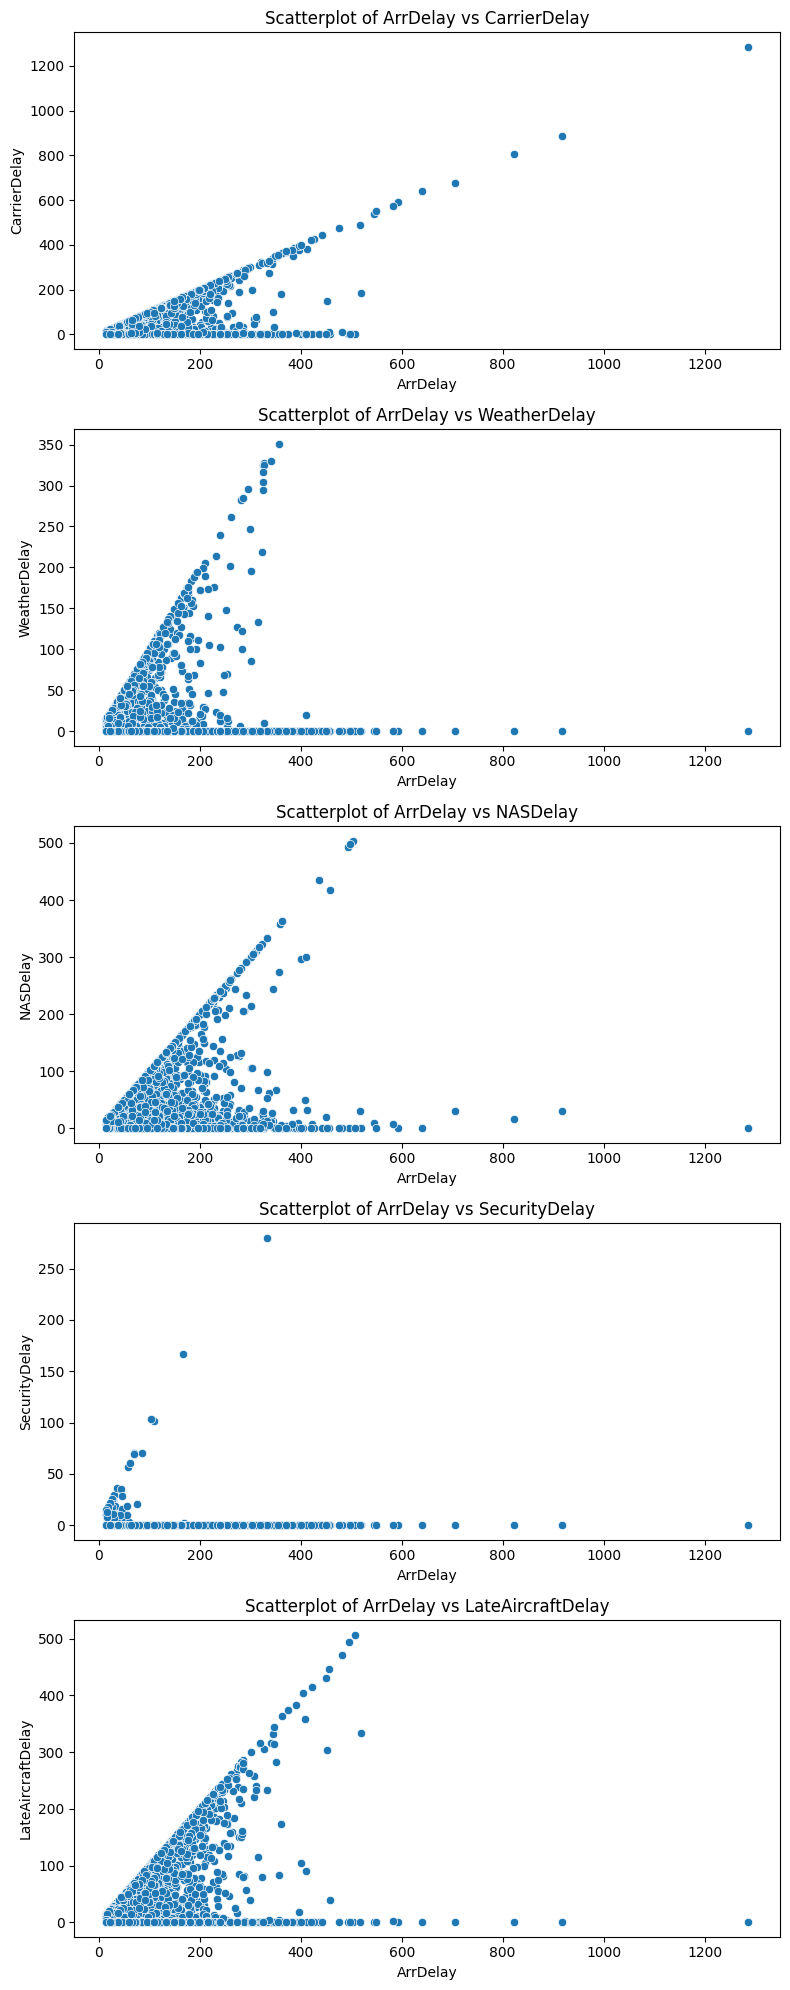

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# ตั้งค่าขนาดของแต่ละ figure
fig, axes = plt.subplots(nrows=len(analysisCol_list), figsize=(8, 4*len(analysisCol_list)))

for idx, col in enumerate(analysisCol_list):
    sns.scatterplot(data=raw_pd, x='ArrDelay', y=col, ax=axes[idx])
    axes[idx].set_title(f'Scatterplot of ArrDelay vs {col}')

plt.tight_layout()
plt.show()


In [50]:
## Feature Engineering, Model Training and Evaluation

In [51]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

In [52]:
raw_pd['DepTime'] = raw_pd['DepTime'].apply(lambda x:t_timeperiod(x))

In [53]:
features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [54]:
final_pd = features_pd.dropna()

In [55]:
final_pd.count()

UniqueCarrier    68565
Origin           68565
Dest             68565
DepTime          68565
TaxiOut          68565
TaxiIn           68565
DepDelay         68565
DayOfWeek        68565
Distance         68565
ArrDelay         68565
dtype: int64

In [56]:
features_pd.head(20)

,UniqueCarrier,Origin,Dest,DepTime,TaxiOut,TaxiIn,DepDelay,DayOfWeek,Distance,ArrDelay
0,WN,JAN,BWI,12.00-17.59,8.0,7.0,15.0,4,888,21.0
1,WN,LAS,ONT,12.00-17.59,21.0,4.0,15.0,4,197,21.0
2,WN,LAS,SEA,06.00-11.59,11.0,5.0,-1.0,4,866,-26.0
3,WN,LAS,SLC,06.00-11.59,10.0,3.0,-4.0,4,368,-16.0
4,WN,LAS,SNA,06.00-11.59,9.0,5.0,75.0,4,226,74.0
5,WN,MCI,STL,06.00-11.59,12.0,3.0,0.0,4,237,-3.0
6,WN,MDW,BWI,18.00-24.00,8.0,4.0,80.0,4,611,70.0
7,WN,MDW,MCI,12.00-17.59,12.0,4.0,75.0,4,405,67.0
8,WN,MDW,MCO,06.00-11.59,9.0,4.0,20.0,4,989,7.0
9,WN,OAK,LAS,12.00-17.59,23.0,20.0,17.0,4,407,34.0


In [57]:


#raw_pd.isnull().sum()
#nullCol_series = raw_pd.isnull().sum()
#notNull_list = list(nullCol_series[nullCol_series == 0].index)
#notNull_list
#requiredCol_list = ['TaxiIn','TaxiOut','ArrDelay']
#selectedCol_list = notNull_list + requiredCol_list
#noNull_pd = raw_pd.loc[:,selectedCol_list].dropna()
#noNull_pd.isnull().sum()
#noNull_pd.describe()
#noNull_pd.info()

In [58]:
#final_pd = noNull_pd

In [59]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [60]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [61]:
test_df = final_pd.drop(train_df.index)

In [62]:
train_df.count()

UniqueCarrier    54852
Origin           54852
Dest             54852
DepTime          54852
TaxiOut          54852
TaxiIn           54852
DepDelay         54852
DayOfWeek        54852
Distance         54852
ArrDelay         54852
dtype: int64

In [63]:
test_df.count()

UniqueCarrier    13713
Origin           13713
Dest             13713
DepTime          13713
TaxiOut          13713
TaxiIn           13713
DepDelay         13713
DayOfWeek        13713
Distance         13713
ArrDelay         13713
dtype: int64

In [64]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [65]:
type(train_labels)

pandas.core.frame.DataFrame

In [66]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [67]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [68]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest', 'DepTime']
Numerical columns are: ['TaxiOut', 'TaxiIn', 'DepDelay', 'DayOfWeek', 'Distance']


In [69]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [70]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', DecisionTreeRegressor(max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 12.983164805461891
	 R2 score: 0.8790912863208981
